In [6]:
import numpy as np
 
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [8]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.87108917],
       [2.97987917]])

In [11]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.87108917],
       [9.83084752]])

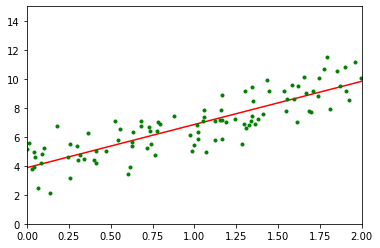

In [13]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict,"r-")
plt.plot(X, y,"g.")
plt.axis([0,2,0,15])
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.87108917]), array([[2.97987917]]))

In [15]:
lin_reg.predict(X_new)

array([[3.87108917],
       [9.83084752]])

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd, residuals, rank, s

(array([[3.87108917],
        [2.97987917]]),
 array([112.86189436]),
 2,
 array([14.71776556,  3.92154396]))

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[3.87108917],
       [2.97987917]])

In [19]:
#Batch GD
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.87108917],
       [2.97987917]])

In [22]:
#Stochastic Grdient Descent
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
    
theta

array([[3.8998597 ],
       [2.95008686]])

In [24]:
#perform Linear Regression using SGD with Scikit - learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.812071]), array([2.93064574]))

In [26]:
SGDRegressor?

Init signature:
SGDRegressor(
    loss='squared_loss',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value because of t

In [27]:
#Mini-batch Gradient Descent

In [32]:
#Polynomial Regression

#generate nonlinear model
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [33]:
#transform training data, adding the square of each feature in training set as new feature
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.91024644]), array([0.91024644, 0.82854857]))

In [36]:
poly_features.get_feature_names()

['x0', 'x0^2']

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11508341]), array([[0.95156895, 0.48672905]]))

In [39]:
#Learning Curve

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [] , []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')

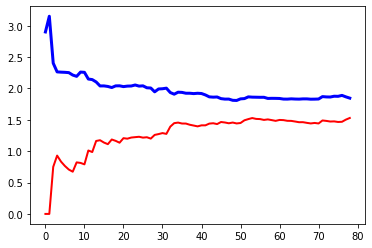

In [40]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

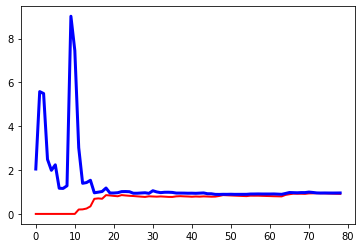

In [41]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_feature", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

In [42]:
#Ridge Regression

#closed -form solution

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.14269194]])

In [44]:
#GD
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.11054826])

In [45]:
#Lasso Regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

#penalty 에 l1을 넣어준다면 GD로도 구현가능.

array([5.1023488])

In [46]:
#Elastic net

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.10199478])

In [49]:
#Early Stopping

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = 'constant', eta0 = 0.0005)

minimun_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(10000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimun_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [53]:
#Logistic Regression
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


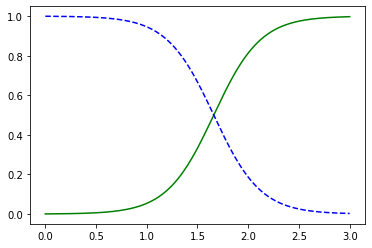

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,1],'g-',label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:,0],'b--',label = 'non Iris-Virginica')

In [56]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [57]:
#Softmax Regression
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5,2]]), softmax_reg.predict_proba([[5,2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))